In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kshape.core_gpu import kshape as ks_gpu
import joblib
import pandas as pd
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

#请注意，这部分代码涉及很多切片索引，我编程时也是按照结果为导向的，其中的具体细节非常非常难读懂

In [2]:
BVOCs=[
    '1,3-丁二烯浓度',
    '丁烯浓度',
    '异戊二烯浓度',
    '戊烯浓度',
    '己烯、甲基环戊烷浓度',
    '苯乙烯浓度',
]
VOCs=['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度', '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度', '二甲基甲酰胺浓度', '甲酸乙酯浓度', '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度', '乙硫醚、丁硫醇浓度', '甲苯浓度', '苯胺浓度', '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度', '三乙胺浓度', '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度', '1,3-二氯丙烯浓度', '正辛烷浓度', '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度', '磷酸三甲酯浓度', '正癸醇浓度', '二氯苯浓度', '二乙基苯胺浓度', '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度', '二溴甲烷浓度', '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度']

columnall=['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度', '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度', '二甲基甲酰胺浓度', '甲酸乙酯浓度', '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度', '乙硫醚、丁硫醇浓度', '甲苯浓度', '苯胺浓度', '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度', '三乙胺浓度', '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度', '1,3-二氯丙烯浓度', '正辛烷浓度', '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度', '磷酸三甲酯浓度', '正癸醇浓度', '二氯苯浓度', '二乙基苯胺浓度', '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度', '二溴甲烷浓度', '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度', '0.25um', '0.28um', '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um', '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um', '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um', 'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'CO', 'O3', '负氧离子', '地面层净辐射', '地面层温度', '地面层湿度']


tchoose=['异戊二烯浓度','1,3-丁二烯浓度','丁烯浓度', '戊烯浓度']
clsutervar=['异戊二烯浓度','1,3-丁二烯浓度','丁烯浓度', '戊烯浓度','NOx','O3','PM1']
clusterDML=['异戊二烯浓度','1,3-丁二烯浓度','丁烯浓度', '戊烯浓度','NOx','O3','PM1', 'SO2','地面层净辐射', '地面层温度', '地面层湿度']

In [3]:
#金海
Month = [ "Aug", "Sept", "Oct", "Nov", "Dec","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
#金海的合并
datajh = joblib.load("datanpjh.pkl")
datadicjh=joblib.load("datanpjh.pkl")
dataTVOCjh=joblib.load("TVOCjh")
dataTVOCVMDtempjh=pd.DataFrame(joblib.load("dataTVOCVMDjh.pkl"))
datatempjh=joblib.load('dataVMDjh.pkl')
datatempmjh=[]
dataTVOCVMDjh=[]
A=0
B=0
for i in range(len(datajh)):
    A=A+datadicjh[i].shape[0]
    datatempmjh.append(datatempjh.loc[B:(A-1)].reset_index(drop=True))
    dataTVOCVMDjh.append(dataTVOCVMDtempjh.loc[B:(A-1)].reset_index(drop=True))
    B=B+datadicjh[i].shape[0]
#崇明
#崇明的合并
datacm = joblib.load("datanpcm.pkl")
datadiccm = joblib.load("datanpcm.pkl")
dataTVOCcm = joblib.load("TVOCcm")
dataTVOCVMDtempcm = pd.DataFrame(joblib.load("dataTVOCVMDcm.pkl"))
datatempcm = joblib.load('dataVMDcm.pkl')
dataTVOCVMDcm = []
datatempmcm = []
A = 0
B = 0
for i in range(len(datacm)):
    A = A + datadiccm[i].shape[0]
    datatempmcm.append(datatempcm.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDcm.append(dataTVOCVMDtempcm.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadiccm[i].shape[0]

In [4]:
monthchoose=[Month.index("Aug"),Month.index("Jun"),Month.index("Jul")]
place=["jh","cm"]

In [5]:
datajhc=[]
datacmc=[]
for i in monthchoose:
    datajhc.append(datatempmjh[i][clusterDML])
    datacmc.append(datatempmcm[i][clusterDML])
datacom=[datajhc,datacmc]

In [6]:
from scipy.interpolate import interp1d
def transform_to_same_length(x,  max_length):
    n = x.shape[0]
    # x的形状(n,var,length)

    # the new set in ucr form np array
    ucr_x = np.zeros((n, max_length, 1), dtype=np.float64)


    mts = x
    curr_length = n
    idx = np.array(range(curr_length))
    idx_new = np.linspace(0, idx.max(), max_length)
    # linear interpolation
    f = interp1d(idx, mts, kind='cubic')
    new_ts = f(idx_new)

    return new_ts

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Dictionary to store MinMaxScaler for each subset
scalers = {}


# 处理数据
for q, p in enumerate(datacom):
    for i, j in enumerate(p):
        cluster = np.array(pd.read_table("result_cluster" + str(4) + "TICC_" + Month[monthchoose[i]] + place[q] + ".txt", sep=',', header=None))

        # Create a new MinMaxScaler instance
        scaler = MinMaxScaler()

        # 使用MinMaxScaler缩放数据
        j_scaled = scaler.fit_transform(j)

        # Create an identifier for each dataframe
        identifier = f"{q}_{i}"
        scalers[identifier] = scaler

        # 创建一个新的数据框并分配列名
        df = pd.DataFrame(j_scaled, columns=clusterDML)

        # 添加其他列
        df["TICCcluster"] = cluster
        df["Place"] = place[q]
        df["Month"] = Month[monthchoose[i]]

        # 更新datacom
        datacom[q][i] = df

In [8]:
import copy
# 数据处理
relen = 500
dataclu_list = []  # 这个列表将存储所有处理后的子数据框
data_temp = copy.deepcopy(datacom)
dataclu_mapping = []  # 用于记录每个子数据框的位置

for q, data_frames in enumerate(data_temp):
    for i, df in enumerate(data_frames):
        # 获取TICCcluster列的值
        cluster_values = df['TICCcluster'].unique()

        for cluster_val in cluster_values:
            # 记录当前子数据框的位置
            dataclu_mapping.append((q, i, cluster_val))

            # 对每个TICCcluster值进行拆分
            sub_df = df[df['TICCcluster'] == cluster_val]

            # 只取clsutervar中的列
            sub_df = sub_df[clsutervar]

            # 对每一列应用transform_to_same_length函数
            sub_df_transformed = sub_df.apply(lambda col: transform_to_same_length(col.reset_index(drop=True), relen))

            # 将处理后的子数据框添加到dataclu_list中
            dataclu_list.append(sub_df_transformed.values)

# 将dataclu_list转化为一个三维numpy数组
dataclu = np.array(dataclu_list)

In [9]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.barycenters import softdtw_barycenter
# kmeans = TimeSeriesKMeans(n_clusters = 4, n_init = 1, max_iter = 100, metric="dtw",n_jobs=-1)
# kmeans.fit(dataclu)

In [140]:
from sklearn.metrics import silhouette_score

# 1. 使用肘部方法和轮廓系数来确定最佳簇数量
inertias = []
max_clusters = 10  #尝试最多10个簇

for n_clusters in range(1, max_clusters + 1):
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, n_init=5, max_iter=100, metric="dtw", n_jobs=-1)
    kmeans.fit(dataclu)
    inertias.append(kmeans.inertia_)

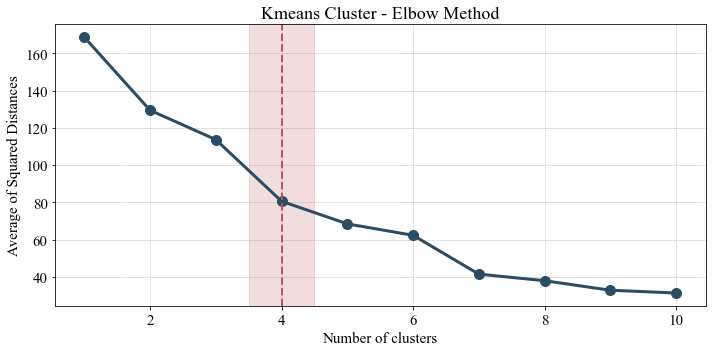

In [142]:

# 绘制美化的肘部图
fig, ax = plt.subplots(figsize=(10, 5))

# 主线和标记
ax.plot(range(1, max_clusters + 1), inertias, marker='o', color='#2A4C65', linewidth=3, markersize=10)

# 标题和标签
ax.set_xlabel('Number of clusters', fontsize=15)
ax.set_ylabel('Average of Squared Distances', fontsize=15)
ax.set_title('Kmeans Cluster - Elbow Method', fontsize=18)
ax.tick_params(axis='both', labelsize=15)

# 突出的垂直线
ax.axvline(x=4, color='#B95756', linestyle='--', linewidth=2)
ax.axvspan(3.5, 4.5, color='#B95756', alpha=0.2)

# 网格线
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# 保存并显示
plt.tight_layout()
plt.savefig('KMcluster.svg')
plt.show()

In [152]:
joblib.dump(kmeans,'kmeans10cluster.pkl')

['kmeans10cluster.pkl']

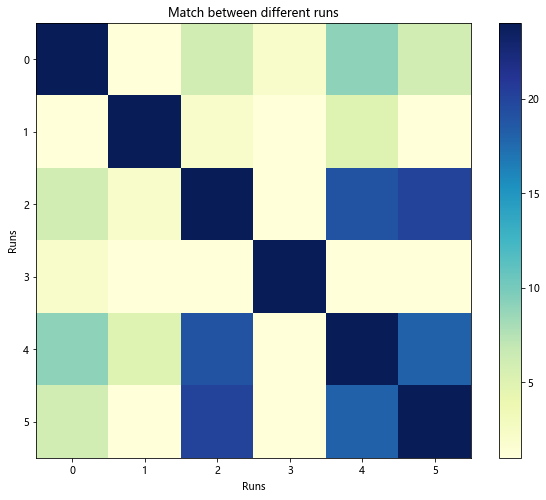

In [21]:
# 3. 稳健性检查
n_runs = 6
labels_list = []

# 计算所有运行之间的匹配度
match_matrix = np.zeros((n_runs, n_runs))

for _ in range(n_runs):
    kmeans = TimeSeriesKMeans(n_clusters=4, n_init=10, max_iter=100, metric="dtw", n_jobs=-1)
    kmeans.fit(dataclu)
    labels_list.append(kmeans.labels_)


for i in range(n_runs):
    for j in range(n_runs):
        match_matrix[i, j] = np.sum(labels_list[i] == labels_list[j])

# 可视化匹配度矩阵
plt.figure(figsize=(10, 8))
plt.imshow(match_matrix, cmap="YlGnBu", interpolation="none")
plt.colorbar()
plt.title("Match between different runs")
plt.xlabel("Runs")
plt.ylabel("Runs")
plt.xticks(range(n_runs))
plt.yticks(range(n_runs))
plt.show()

In [21]:
kmeans = TimeSeriesKMeans(n_clusters = 4, n_init = 20, max_iter = 10000, metric="dtw",n_jobs=-1,random_state=53)
kmeans.fit(dataclu)

TimeSeriesKMeans(max_iter=10000, metric='dtw', n_clusters=4, n_init=20,
                 n_jobs=-1, random_state=53)

In [22]:
# joblib.dump(kmeans,"kmeans.pkl")

['kmeans.pkl']

In [153]:
kmeans=joblib.load("kmeans.pkl")

In [135]:
def plot_output(model, name, motifs, nclu, clsutervar, allvarnames,realname):
    # Find the indices of the variables to be plotted
    indices = [allvarnames.index(var) for var in clsutervar]

    Nshape = len(clsutervar)
    fig, ax = plt.subplots(Nshape, nclu, sharex=True, sharey=True, figsize=(10, 10))
    fig.suptitle(name, fontsize=20, weight='bold')
    fig.subplots_adjust(hspace=0, wspace=0)
    fig.suptitle(name)

    # Set ylabels
    for i in range(Nshape):
        ax[i, 0].set_ylabel(f"{realname[i]}", fontsize=10)

    # Plot each motif on the axes associated with the cluster label.
    for motif, l in zip(motifs, model.labels_):
        # Use only those traces that are in clsutervar
        for idx, i in enumerate(indices):
            ax[idx, l].plot(motif.T[i], alpha=0.8, lw=1.2, c="gray",linestyle='--')

    # Create a dictionary to store motifs by cluster and variable
    d = {}
    for i in range(Nshape):
        for j in range(nclu):
            d[str(i) + "&" + str(j)] = []

    for motif, l in zip(motifs, model.labels_):
        # Use only those traces that are in clsutervar
        for idx, i in enumerate(indices):
            d[str(idx) + "&" + str(l)].append(motif.T[i])

    # Plot the cluster centers on top in red
    for i, center in enumerate(model.cluster_centers_):
        ax[0, i].set_title(f"cluster {i}", fontsize=14)
        for idx, j in enumerate(indices):
            X = np.array(d[str(idx) + "&" + str(i)])
            barycenter = softdtw_barycenter(X, gamma=1., max_iter=50, tol=1e-3)
            ax[idx, i].plot(barycenter.ravel(), c="#B95756", alpha=0.8, lw=3.5)
            # ax[idx, i].grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
            # ax[idx, i].xaxis.set_visible(True)
            # ax[idx, i].yaxis.set_visible(True)
            ax[idx, i].set_xticks([])
            ax[idx, i].set_yticks([])
            y_range = np.arange(0, 1, 1/6)  # 这只是一个示例，您需要根据数据的实际范围来调整
            x_range = np.arange(0, relen, relen/6)  # 同上

            for line in x_range:
                ax[idx, i].axvline(line, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

            for line in y_range:
                ax[idx, i].axhline(line, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)


     # Create custom legend
    import matplotlib.lines as mlines
    gray_line = mlines.Line2D([], [], color='gray', label='Original Data',linestyle='-.')
    red_line = mlines.Line2D([], [], color='#B95756', label='Cluster Center')
    fig.legend(handles=[gray_line, red_line],frameon=False, loc="upper center", fontsize=14, ncol=2, bbox_to_anchor=(0.5, 0.95))
    # plt.show()

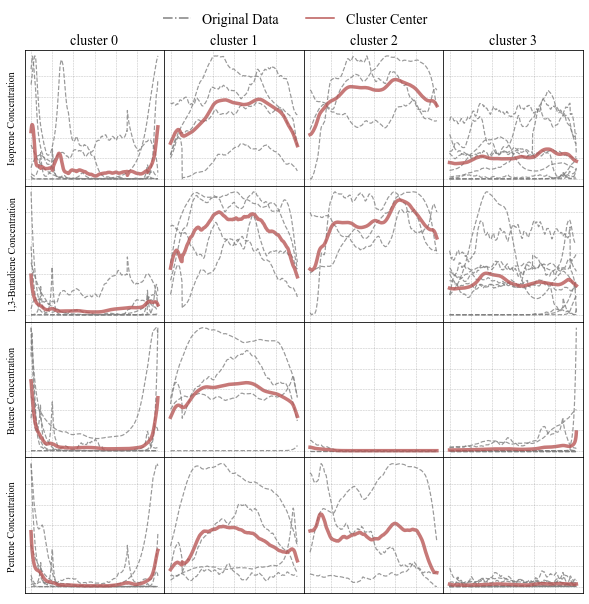

In [137]:
plot_output(kmeans, "", dataclu, 4, tchoose, clsutervar,['Isoprene Concentration',
    '1,3-Butadiene Concentration',
    'Butene Concentration',
    'Pentene Concentration'])
# plt.tight_layout()
plt.savefig("Tclusterplot.svg", bbox_inches='tight')

In [172]:
# 将聚类结果返回到datacom
for idx, (q, i, cluster_val) in enumerate(dataclu_mapping):
    label = kmeans.labels_[idx]
    datacom[q][i].loc[datacom[q][i]['TICCcluster'] == cluster_val, 'ClusterLabel'] = label

In [161]:
# 将datacom扁平化为一个单一的数据框列表
flat_datacom = [df for sublist in datacom for df in sublist]
# 使用pd.concat将所有数据框合并为一个
dataDML = pd.concat(flat_datacom, ignore_index=True)
dataDML

,异戊二烯浓度,"1,3-丁二烯浓度",丁烯浓度,戊烯浓度,NOx,O3,PM1,SO2,地面层净辐射,地面层温度,地面层湿度,TICCcluster,Place,Month,ClusterLabel
0,0.003246,0.012608,8.333622e-02,0.925776,0.037462,0.623314,0.173836,0.911818,0.531835,0.879765,0.105140,0,jh,Aug,2.0
1,0.003291,0.012722,8.335175e-02,0.925678,0.037460,0.623309,0.173844,0.911807,0.531885,0.879767,0.105139,0,jh,Aug,2.0
2,0.003364,0.012934,8.337788e-02,0.925282,0.037459,0.623299,0.173857,0.911785,0.531985,0.879770,0.105137,0,jh,Aug,2.0
3,0.003375,0.013249,8.342948e-02,0.924841,0.037458,0.623284,0.173875,0.911754,0.532134,0.879775,0.105133,0,jh,Aug,2.0
4,0.003128,0.013638,8.350251e-02,0.924259,0.037457,0.623263,0.173897,0.911714,0.532332,0.879781,0.105128,0,jh,Aug,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76353,0.023748,0.040174,3.083440e-09,0.000464,0.663785,0.309022,0.033707,0.000370,0.357397,0.821335,0.100161,1,cm,Jul,0.0
76354,0.023727,0.040141,2.133152e-09,0.000464,0.663774,0.309036,0.033693,0.000228,0.357396,0.821337,0.100157,1,cm,Jul,0.0
76355,0.023707,0.040118,3.081420e-09,0.000464,0.663765,0.309046,0.033684,0.000117,0.357396,0.821338,0.100155,1,cm,Jul,0.0
76356,0.023692,0.040102,2.133174e-09,0.000464,0.663759,0.309053,0.033676,0.000040,0.357396,0.821339,0.100154,1,cm,Jul,0.0


In [29]:
dataDML.to_excel("dataDML.xlsx")

In [173]:
# Flatten datacom into a single dataframe list
flat_datacom = [df for sublist in datacom for df in sublist]
# Concatenate all dataframes into one
dataDML = pd.concat(flat_datacom, ignore_index=True)

# Now, inverse transform each subset of dataDML using saved scalers
for q, p in enumerate(datacom):
    for i, j in enumerate(p):
        # Get the corresponding scaler
        identifier = f"{q}_{i}"
        scaler = scalers[identifier]

        # Select the rows corresponding to the current subset
        subset_rows = (dataDML['Place'] == place[q]) & (dataDML['Month'] == Month[monthchoose[i]])

        # Inverse transform the data
        dataDML.loc[subset_rows, clusterDML] = scaler.inverse_transform(dataDML.loc[subset_rows, clusterDML])

In [175]:
dataDML.to_excel("dataDMLnoscale.xlsx")

In [10]:
dataDML=pd.read_excel("dataDMLnoscale.xlsx")

In [11]:
dataDML

,Unnamed: 0,异戊二烯浓度,"1,3-丁二烯浓度",丁烯浓度,戊烯浓度,NOx,O3,PM1,SO2,地面层净辐射,地面层温度,地面层湿度,TICCcluster,Place,Month,ClusterLabel
0,0,0.824809,1.023420,6.039046e-02,1.020860,10.398318,37.210485,12.171348,3.061825,56.636985,36.724194,52.584619,0,jh,Aug,2
1,1,0.824966,1.023651,6.040172e-02,1.020763,10.398269,37.210187,12.171461,3.061805,56.642700,36.724215,52.584563,0,jh,Aug,2
2,2,0.825225,1.024082,6.042065e-02,1.020372,10.398206,37.209573,12.171639,3.061767,56.654085,36.724259,52.584452,0,jh,Aug,2
3,3,0.825264,1.024721,6.045804e-02,1.019937,10.398165,37.208622,12.171892,3.061712,56.671141,36.724324,52.584286,0,jh,Aug,2
4,4,0.824389,1.025512,6.051097e-02,1.019362,10.398151,37.207335,12.172202,3.061642,56.693861,36.724411,52.584064,0,jh,Aug,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76353,76353,0.069446,0.016855,2.216370e-08,0.004844,8.495156,15.707872,7.337394,1.558032,2.717827,36.618016,68.353371,1,cm,Jul,0
76354,76354,0.069386,0.016841,1.394885e-08,0.004841,8.495056,15.708468,7.337082,1.557816,2.717821,36.618026,68.353238,1,cm,Jul,0
76355,76355,0.069327,0.016831,2.214623e-08,0.004839,8.494978,15.708930,7.336853,1.557647,2.717818,36.618033,68.353173,1,cm,Jul,0
76356,76356,0.069282,0.016825,1.394903e-08,0.004839,8.494924,15.709247,7.336680,1.557531,2.717815,36.618039,68.353152,1,cm,Jul,0


In [24]:
# 计算最小长度
min_length = dataDML.groupby(['Place', 'Month']).size().min()

# 为每个月定义一个组
group_mapping = {"Aug": 0, "Jun": 1, "Jul": 2}

# 重采样函数
def resample_series(group):
    # 取得当前组的长度
    current_length = len(group)

    # 创建新的索引
    idx = np.linspace(0, current_length - 1, min_length)

    # 对每一列进行插值
    resampled_data = {}
    for column in group.columns:
        if column not in ['Place', 'Month', 'TICCcluster', 'ClusterLabel']:
            f = interp1d(np.arange(current_length), group[column].values, kind='linear')
            resampled_data[column] = f(idx)
        else:
            # 对于非连续变量，我们只是复制其值
            resampled_data[column] = [group[column].values[0]] * min_length

    return pd.DataFrame(resampled_data)

# 应用函数
resampled_df = dataDML.groupby(['Place', 'Month']).apply(resample_series).reset_index(drop=True)

# 添加 group 列
resampled_df['group'] = resampled_df['Month'].map(group_mapping)

# 删除名为 "Unnamed: 0" 的列（如果存在）
if "Unnamed: 0" in resampled_df.columns:
    resampled_df = resampled_df.drop(columns=["Unnamed: 0"])

# 获取数值型列
numeric_cols = resampled_df.select_dtypes(include=[np.number]).columns.tolist()

# 只对数值型列进行操作：将所有小于0的值设为0
resampled_df[numeric_cols] = resampled_df[numeric_cols].clip(lower=0)

resampled_df

,异戊二烯浓度,"1,3-丁二烯浓度",丁烯浓度,戊烯浓度,NOx,O3,PM1,SO2,地面层净辐射,地面层温度,地面层湿度,TICCcluster,Place,Month,ClusterLabel,group
0,4.039920,2.999203,0.000000e+00,0.557097,5.396600,10.136173,10.982806,8.213663,0.000000,30.339480,95.891603,0,cm,Aug,3,0
1,4.040478,2.999088,3.015289e-09,0.557158,5.396586,10.136252,10.983378,8.213662,0.000000,30.339490,95.891620,0,cm,Aug,3,0
2,4.040636,2.999062,0.000000e+00,0.557042,5.396559,10.136456,10.984586,8.213656,0.000000,30.339510,95.891653,0,cm,Aug,3,0
3,4.040197,2.998851,8.582990e-10,0.556916,5.396520,10.136829,10.986381,8.213648,0.000000,30.339541,95.891702,0,cm,Aug,3,0
4,4.039512,2.998482,2.060160e-10,0.556715,5.396466,10.137392,10.988718,8.213643,0.000000,30.339583,95.891768,0,cm,Aug,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74011,1.776094,0.616796,9.085357e-01,0.284287,3.410874,29.175691,16.986395,4.874893,53.958494,30.818859,60.996091,1,jh,Jun,0,1
74012,1.783543,0.609734,8.983222e-01,0.280478,3.414821,29.082730,16.842136,4.872050,53.791749,30.830007,61.068513,1,jh,Jun,0,1
74013,1.791085,0.602725,8.876883e-01,0.276767,3.418815,28.988460,16.695815,4.869200,53.624086,30.841327,61.141727,1,jh,Jun,0,1
74014,1.798738,0.595742,8.768875e-01,0.273103,3.422859,28.892884,16.547580,4.866335,53.455586,30.852819,61.215714,1,jh,Jun,0,1


In [26]:
resampled_df.to_excel("dataDMLresampled.xlsx")